<a href="https://colab.research.google.com/github/hasanocal7/DS-Libs/blob/main/Pandas_MatPlotLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [11]:
df["type"].value_counts(normalize = True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

In [14]:
for column in df.columns:
  print(df[column].value_counts())
  print("-"*100)

s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: show_id, Length: 8807, dtype: int64
----------------------------------------------------------------------------------------------------
Movie      6131
TV Show    2676
Name: type, dtype: int64
----------------------------------------------------------------------------------------------------
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: title, Length: 8807, dtype: int64
-----------------------------------------------------------------

In [20]:
for cl in df.columns:
  print(cl)
  mask = df[cl].isnull()

  if mask.any():
    print("\tNull değerler var -->", cl)
    mode_value = df[cl].mode().iloc[0]
    print("\t\tMode değeri ile dolduruluyor -->", mode_value)
    df[cl].fillna(mode_value, inplace = True)

show_id
type
title
director
	Null değerler var --> director
		Mode değeri ile dolduruluyor --> Rajiv Chilaka
cast
	Null değerler var --> cast
		Mode değeri ile dolduruluyor --> David Attenborough
country
	Null değerler var --> country
		Mode değeri ile dolduruluyor --> United States
date_added
	Null değerler var --> date_added
		Mode değeri ile dolduruluyor --> January 1, 2020
release_year
rating
	Null değerler var --> rating
		Mode değeri ile dolduruluyor --> TV-MA
duration
	Null değerler var --> duration
		Mode değeri ile dolduruluyor --> 1 Season
listed_in
description


In [21]:
df["country"].isna().sum()

0

## Data Visualization

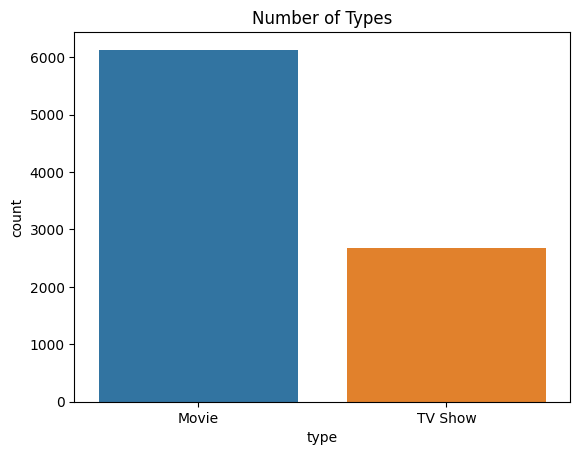

In [22]:
sns.countplot(df,
              x = "type")
plt.title("Number of Types")
plt.show()

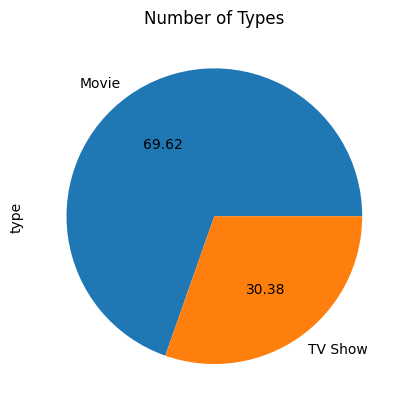

In [28]:
df["type"].value_counts().plot(kind = "pie", 
                               autopct = "%1.2f")
plt.title("Number of Types")
plt.show()

# Hangi 10 ülke daha çok içerik üretmiş?

In [30]:
data = df["country"].value_counts().head(10)

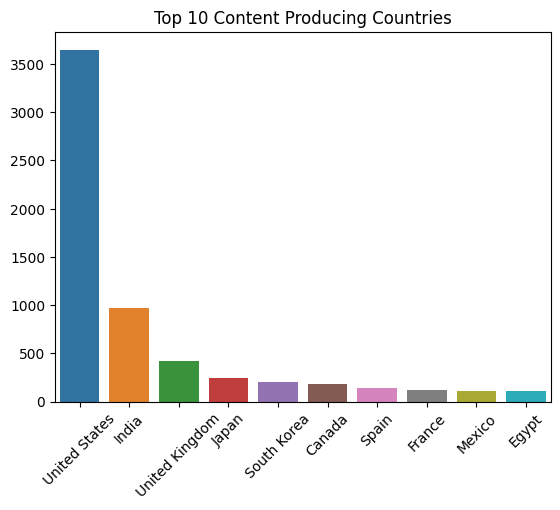

In [38]:
#sns.barplot(y = data.index, x = data.values)
sns.barplot(x = data.index, y = data.values)
plt.xticks(rotation = 45)
plt.title("Top 10 Content Producing Countries")
plt.show()

In [44]:
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = (df["date_added"]).dt.year
df["month_added"] = (df["date_added"]).dt.month
df[["date_added", "year_added", "month_added"]]

,date_added,year_added,month_added
0,2021-09-25,2021,9
1,2021-09-24,2021,9
2,2021-09-24,2021,9
3,2021-09-24,2021,9
4,2021-09-24,2021,9
...,...,...,...
8802,2019-11-20,2019,11
8803,2019-07-01,2019,7
8804,2019-11-01,2019,11
8805,2020-01-11,2020,1


In [52]:
movie_counts = df[df["type"] == "Movie"].groupby(["year_added", "month_added"])
movie_counts = movie_counts.size().reset_index(name = "count")
movie_counts

,year_added,month_added,count
0,2008,1,1
1,2009,5,1
2,2009,11,1
3,2010,11,1
4,2011,5,1
...,...,...,...
100,2021,5,94
101,2021,6,124
102,2021,7,169
103,2021,8,117


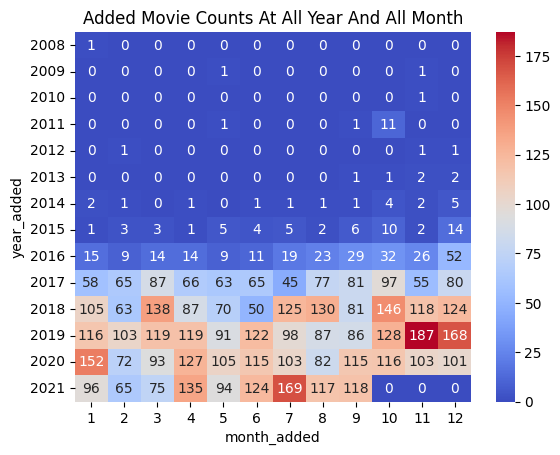

In [62]:
heatmap_data = movie_counts.pivot_table(values = "count",
                         index = "year_added",
                         columns = "month_added", 
                         fill_value = 0)

sns.heatmap(heatmap_data, 
            annot = True, 
            fmt = "d",
            cmap = "coolwarm")

plt.title("Added Movie Counts At All Year And All Month")
plt.show()

In [64]:
release_counts = df.groupby(["release_year", "type"]).size().reset_index(name = "count")

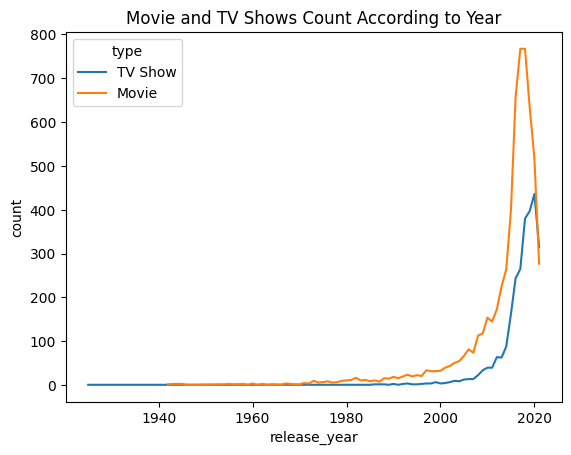

In [67]:
sns.lineplot(release_counts,
             x = "release_year",
             y = "count",
             hue = "type")

plt.title("Movie and TV Shows Count According to Year")
plt.show()

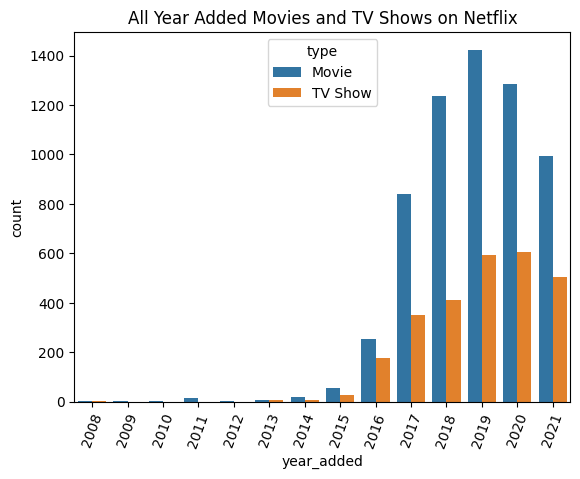

In [74]:
content_counts = df.groupby(["year_added", "type"]).size().reset_index(name = "count")

sns.barplot(content_counts,
            x = "year_added",
            y = "count",
            hue = "type")

plt.title("All Year Added Movies and TV Shows on Netflix")
plt.xticks(rotation = 70)
plt.show()

In [ ]:
# Done. Peace out <3